# Set Up

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import display_image, display_images

## Thresholding

In [2]:
# modes of thresholding
flags = [i for i in dir(cv) if i.startswith("THRESH")]
flags

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [3]:
img = np.fromfunction(lambda i, j: j, (50, 256), dtype=np.uint8)

# set up a trackbar callback function
def trackbar(x):
    # x is the manual threshold (user-defined)
    _, th1 = cv.threshold(img, x, 255, cv.THRESH_BINARY)
    _, th2 = cv.threshold(img, x, 255, cv.THRESH_BINARY_INV)
    _, th3 = cv.threshold(img, x, 255, cv.THRESH_TRUNC)
    _, th4 = cv.threshold(img, x, 255, cv.THRESH_TOZERO)
    _, th5 = cv.threshold(img, x, 255, cv.THRESH_TOZERO_INV)
    
    large_arr = np.vstack([th1, th2, th3, th4, th5])
    cv.imshow("window", large_arr)

# create window
cv.namedWindow("window")
    
# create trackbar
cv.createTrackbar("thresholds", "window", 100, 255, trackbar)
    
cv.waitKey(0)
cv.destroyAllWindows()

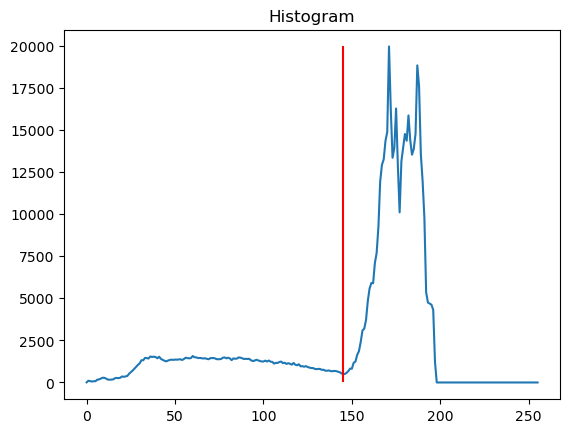

In [4]:
img = cv.imread("images/leaf.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

plt.plot(hist)
plt.title("Histogram")
plt.vlines(145, ymin=0, ymax=hist.max(), color="red")
plt.show()

In [5]:
display_image("image", img, adjust=True)

In [6]:
th = cv.threshold(gray, 145, 255, cv.THRESH_BINARY_INV)[1]

display_images([img, th], ("original", "threshold"), adjust=True)

## Otsu thresholding
Otsu thresholding will choose the $T$ automatically.

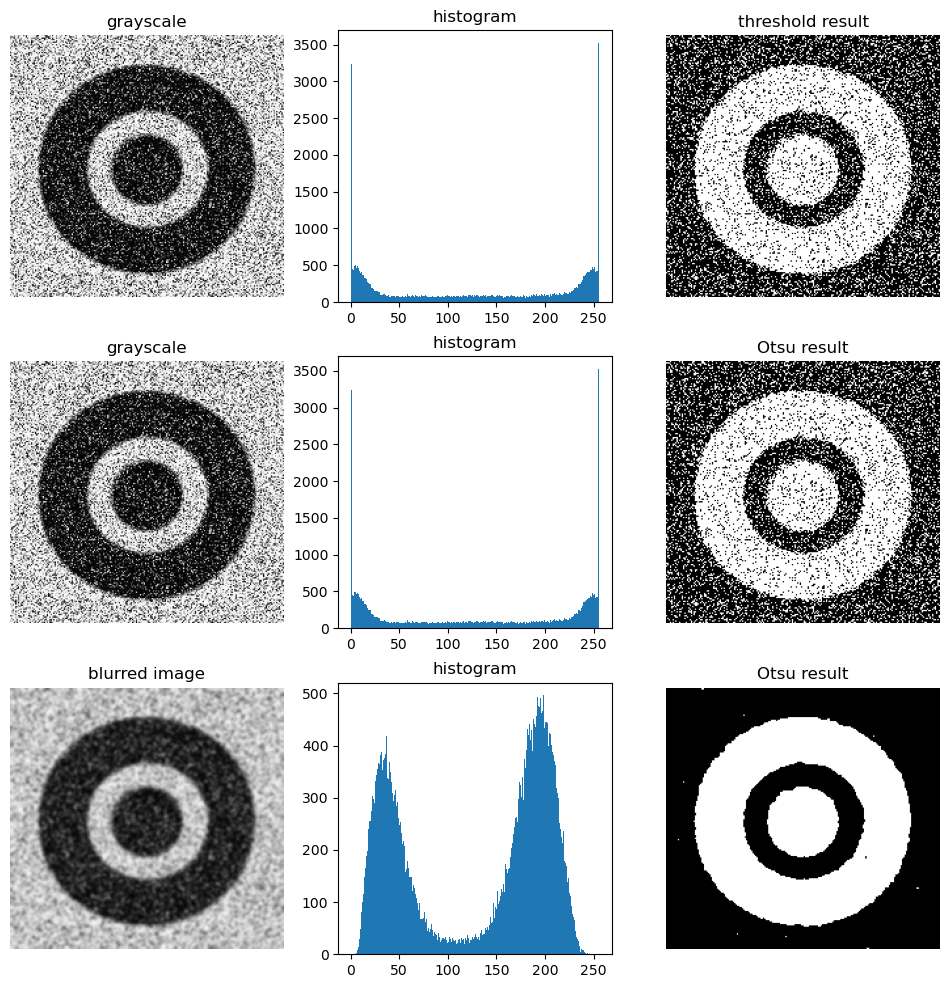

In [7]:
gray = cv.imread("images/noisy.jfif", 0)

# display_image("img", img)

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 1st method: manual threshold
th1 = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)[1]

# 2nd method: Otsu threshold
th2 = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# 3rd method: Denoise + Otsu
blur = cv.GaussianBlur(gray, (5, 5), 0)
th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# store all the results in a list
images = [gray, None, th1,
       gray, None, th2,
       blur, None, th3]

# titles
titles = ("grayscale", "histogram", "threshold result",
         "grayscale", "histogram", "Otsu result",
         "blurred image", "histogram", "Otsu result")

plt.figure(figsize=(12, 12))

for i in range(3):
    plt.subplot(3, 3, 3*i + 1), plt.imshow(images[3*i], cmap="gray", vmin=0, vmax=255)
    plt.title(titles[3*i]), plt.axis("off")
    plt.subplot(3, 3, 3*i + 2), plt.hist(images[3*i].flatten(), 256, [0, 256])
    plt.title(titles[3*i+1])
    plt.subplot(3, 3, 3*i + 3), plt.imshow(images[3*i + 2], cmap="gray", vmin=0, vmax=255)
    plt.title(titles[3*i+2]), plt.axis("off")

plt.show()

## Convolution

### Sharpening

### Blurring

In [8]:
# sharpening
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

img = cv.imread("images/camera.jpg")

# convolution
# -1 (second arg): means that we want output of same bit depth as source
dst = cv.filter2D(img, -1, kernel)

display_images([img, dst], ("original image", "sharpened image"), adjust=True)

> sharpen = image + amount * (image - blur)

In [9]:
# blur (denoise)
# mean filtering
ksize = 3
kernel = np.ones((ksize, ksize)) / (ksize * ksize)

dst = cv.filter2D(img, -1, kernel)

display_images([img, dst], ("original image", f"blur with {ksize} x {ksize}"), adjust=True)

In [10]:
# emboss
kernel = np.array([[-2, -1, 0],
                  [-1, 1, 1],
                  [0, 1, 2]])

dst = cv.filter2D(img, -1, kernel)

display_images([img, dst], ("original image", "emboss"), adjust=True)

## Edge detection
1. Sobel x and y
2. Laplacian / Laplacian of Gaussian
3. Canny

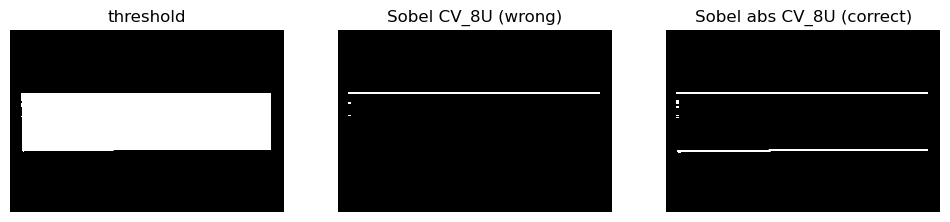

In [11]:
# some important matters about edge detection
gray = cv.imread("images/wood_planck.jfif", 0)
# display_image("gray", gray)

# thresholding
th = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)[1]

# sobel y (horizontal edge): wrong way
sobely8u = cv.Sobel(th, cv.CV_8U, 0, 1)

# sobel y (correct way)
sobely64f = cv.Sobel(th, cv.CV_64F, 0, 1)
sobely_8u = cv.convertScaleAbs(sobely64f)

from utils import matplotlib_show_images
matplotlib_show_images([th, sobely8u, sobely_8u], 1, 3,
                       titles=("threshold", "Sobel CV_8U (wrong)", 
                               "Sobel abs CV_8U (correct)"),
                      figsize=(12, 4))

In [12]:
# comparison between Sobel and LoG
img = cv.imread("images/camera.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# sobel x and y
sobel_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
sobel_xy = cv.magnitude(sobel_x, sobel_y)
sobel_xy = cv.convertScaleAbs(sobel_xy)

# Laplacian of Gaussian
blur = cv.GaussianBlur(gray, (5, 5), 0)
laplacian = cv.Laplacian(blur, cv.CV_64F, ksize=3)
laplacian = cv.convertScaleAbs(laplacian)

display_images([sobel_xy, laplacian], ("Sobel x and y",
                                       "Laplacian of Gaussian"), adjust=True)

In [13]:
# Canny edge
img = cv.imread("images/camera.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edge = cv.Canny(gray, 100, 200)

display_image("edge", edge)

In [14]:
# create a callback function
def nothing(x):
    pass

window_name = "Canny"
cv.namedWindow(window_name)
cv.createTrackbar("minVal", window_name, 100, 400, nothing)
cv.createTrackbar("maxVal", window_name, 200, 400, nothing)

while True:
    minVal = cv.getTrackbarPos("minVal", window_name)
    maxVal = cv.getTrackbarPos("maxVal", window_name)
    
    edge = cv.Canny(gray, minVal, maxVal)
    
    cv.imshow(window_name, edge)
    
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:  # press ESC key
        break

cv.destroyAllWindows()

## contour detection

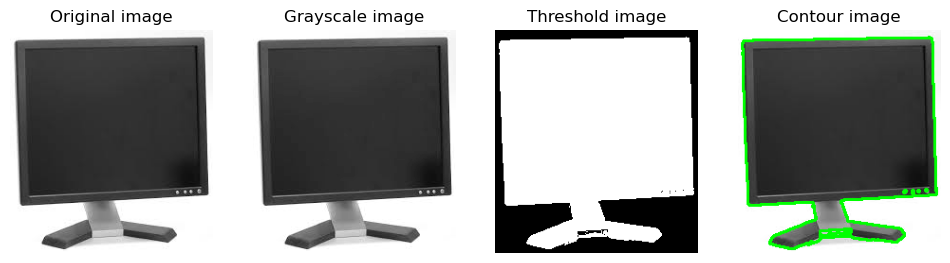

In [15]:
img = cv.imread("images/monitor.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# display_image("gray", gray)

# thresholding -> contour
th = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)[1]
# display_image("threshold", th)

# find contour
contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# draw contour
img_copy = img.copy()
cv.drawContours(img_copy, contours, -1, (0, 255, 0), 2)
display_images([img, gray, th, img_copy],
               ("original image", "grayscale image",
               "threshold image", "contour image"), adjust=True)

from utils import matplotlib_show_images
matplotlib_show_images([img, gray, th, img_copy], 1, 4, 
                      titles=["Original image", "Grayscale image", 
                              "Threshold image", "Contour image"],
                      figsize=(12, 4))

In [16]:
print(f"Number of contours detected: {len(contours)}")

Number of contours detected: 12


In [17]:
type(contours)

tuple

In [18]:
contours[0].shape  # specidying the first contour (object)

(217, 1, 2)

$217$ --$>$  Number of points that outlines the boundary.

$1$ --$>$ always the case

$2$ --$>$ x and y coordinates

In [19]:
contours[1].shape

(4, 1, 2)

Can we get just the monitor?

In [20]:
contours, _ = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# draw contour
img_copy = img.copy()
cv.drawContours(img_copy, contours, -1, (0, 255, 0), 2)
display_image("contour", img_copy)

In [21]:
len(contours)

1

Is there any other way to get the object of interest if `cv.RETR_EXTERNAL` fails?

In [22]:
contours, _ = cv.findContours(th, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# index just the maximum area contour
contour_largest = max(contours, key=cv.contourArea)

# draw contour
img_copy = img.copy()
cv.drawContours(img_copy, [contour_largest], 0, (0, 255, 0), 2)
display_image("contour", img_copy)

## Contour features
1. moments
2. area
3. perimeter
4. centroid
5. bounding box

In [23]:
M = cv.moments(contour_largest)
print(M)

{'m00': 37113.5, 'm10': 3913689.5, 'm01': 3849569.1666666665, 'm20': 529272493.25, 'm11': 402572898.125, 'm02': 519454930.25, 'm30': 80631725758.65001, 'm21': 53484537787.45, 'm12': 53828827220.55, 'm03': 80175930424.35, 'mu20': 116566456.29821026, 'mu11': -3371527.140929699, 'mu02': 120161337.11136603, 'mu30': 234618732.78678894, 'mu21': -702775455.4171028, 'mu12': -249269762.75935364, 'mu03': 1368584318.4292145, 'nu20': 0.08462716040157804, 'nu11': -0.0024477261916909816, 'nu02': 0.08723704119285126, 'nu30': 0.0008841641534443626, 'nu21': -0.002648419664618219, 'nu12': -0.0009393767758931957, 'nu03': 0.005157530180767104}


In [24]:
# Area & perimeter
print(f"Area: {cv.contourArea(contour_largest)}")
print(f"Perimeter: {cv.arcLength(contour_largest, True)}")

Area: 37113.5
Perimeter: 1056.7766919136047


In [25]:
# centroid
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

print("centroid: ", (cx, cy))

centroid:  (105, 103)


## Demo

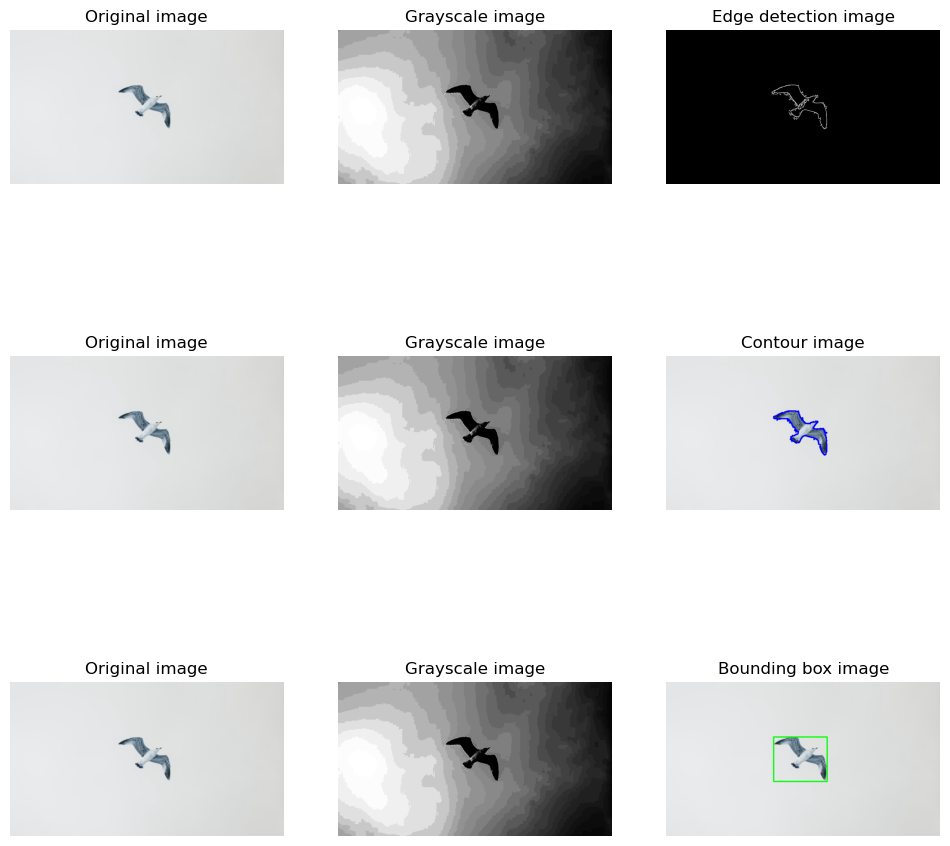

In [71]:
img = cv.imread("images/bird.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# display_image("gray", gray)

# histogram equalization
gray = cv.equalizeHist(gray)

# canny
edge = cv.Canny(gray, 100, 300)
# display_image("edge", edge)

# contour
contours = cv.findContours(edge, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
# len(contours) -> 20

# get the largest contour (post processing)
contour_largest = sorted(contours, key=cv.contourArea, reverse=True)[0]

# draw contours
img_copy = img.copy()
cv.drawContours(img_copy, [contour_largest], 0, (0, 0, 255), 2)
# display_image("contour", img_copy)

# draw bounding box
img_copy2 = img.copy()
x, y, w, h = cv.boundingRect(contour_largest)
cv.rectangle(img_copy2, (x, y), (x + w, y + h), (0, 255, 0), 2)
# display_image("bounding box", img_copy2)

# Plot grayscale images, their histogram and the resulting thresholded image
images = [img, gray, edge,
         img, gray, img_copy,
         img, gray, img_copy2]

titles = ["Original image", "Grayscale image", "Edge detection image",
         "Original image", "Grayscale image", "Contour image",
         "Original image", "Grayscale image", "Bounding box image"]

plt.figure(figsize=(12, 12))
for i in range(3):
    plt.subplot(3, 3, 3*i + 1), plt.imshow(images[3*i], cmap="gray", vmin=0, vmax=255)
    plt.title(titles[3*i]), plt.axis("off")
    
    plt.subplot(3, 3, 3*i + 2), plt.imshow(images[3*i + 1], cmap="gray", vmin=0, vmax=255)
    plt.title(titles[3*i+1]), plt.axis("off")
    
    plt.subplot(3, 3, 3*i + 3), plt.imshow(images[3*i + 2], cmap="gray", vmin=0, vmax=255)
    plt.title(titles[3*i+2]), plt.axis("off")

plt.show()

## Weekly Activities

1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':

$3×3$ kernel:
$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0  \\
\end{bmatrix}
$$
---
$5×5$ kernel:
$$ \begin{bmatrix}
    -1 & -1 & -1 & -1 & -1 \\
    -1 & -1 & -1 & -1 & -1 \\
    -1 & -1 & 25 & -1 & -1 \\
    -1 & -1 & -1 & -1 & -1 \\
    -1 & -1 & -1 & -1 & -1 \\
    \end{bmatrix}$$

What can you infer from the outputs?

#### Solution:

$3×3$ kernel:

In [35]:
kernel_3x3 = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

img = cv.imread('images/native-bee.png')
sharp_img = cv.filter2D(img, -1, kernel_3x3)

display_images([img, sharp_img], ("original", f"sharpen = {kernel_3x3.shape}"))

---
$5×5$ kernel:

In [34]:
kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1],
                      [-1, -1, 25, -1, -1],
                      [-1, -1, -1, -1, -1], 
                      [-1, -1, -1, -1, -1]])

img = cv.imread('images/native-bee.png')
sharp_img = cv.filter2D(img, -1, kernel_5x5)

display_images([img, sharp_img], ("original", f"sharpen = {kernel_5x5.shape}"))

#### Comparing the Outputs:

The $3×3$ kernel will apply a more localized sharpening effect, enhancing edges and details in the image. The central element of 5 amplifies the original pixel value, while the -1 values around it detect and enhance edges.

The $5×5$ kernel will apply a stronger, more global sharpening effect. The large central value of 25 strongly amplifies the original pixel, while the surrounding -1 values detect and enhance edges over a wider area. This can make the image appear more crisp and defined overall.

Some key differences we might observe:

* The $5×5$ kernel will likely produce more pronounced sharpening, making edges and details stand out more.

* Smaller details and textures may be enhanced more by the $3×3$ kernel's localized effect.

* The $5×5$ kernel could potentially introduce more artifacts or ringing effects around strong edges due to its larger size.

* Depending on the image content, one kernel size may be more suitable than the other for achieving the desired sharpening balance.

In summary, the $5×5$ kernel is a more aggressive sharpening filter, while the $3×3$ kernel provides a more subtle, localized sharpening effect. Comparing the outputs can help determine which kernel size best enhances the native-bee.png image for your specific needs.

---
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

#### Solution:

**`Average Filtering`**

In [49]:
# Blurring with mean filtering
kernel = np.ones((5, 5), dtype=np.float32) / 25
img = cv.imread('images/native-bee.png')
dst = cv.filter2D(img, -1, kernel)

display_images([img, dst], ("original", "Average filtering"))

In [59]:
# Averaging smoothing
blur = cv.blur(img, (5, 5))

display_images([img, blur], ("original", "blur"))

**`Gaussian kernel`**

In [51]:
smoothed_gauss = cv.GaussianBlur(img, (5, 5), 0.5)

display_images([img, smoothed_gauss], ("original", "Gaussian smoothing"))

**`Median filtering`**

In [58]:
smoothed_median = cv.medianBlur(img, 3)

display_images([img, smoothed_median], ("original", "Median filtering"))

#### Comparing the Smoothing Techniques

The average filter applies a simple box blur, replacing each pixel with the average of its neighbors. This tends to reduce noise but also blurs edges and details.

The Gaussian filter applies a weighted average using a Gaussian kernel. Pixels closer to the center have a higher weight. This also reduces noise while preserving some edges better than the average filter.

The median filter replaces each pixel with the median value of its neighbors. This is particularly effective at removing salt-and-pepper noise while preserving edges. However, it can create a "splotchy" appearance in some cases.

**`Deducing the Noise Type`**

Based on the appearance of the noise in the '`noise_lena.jpg`' image and the effectiveness of the median filter, we can infer that the predominant noise type is salt-and-pepper noise.

Salt-and-pepper noise consists of random occurrences of white and black pixels. It is often caused by bit errors in sensor elements or analog-to-digital converter errors in image acquisition.

The median filter works well for this type of noise because it effectively removes outliers (the white and black pixels) while preserving edges and details. The average and Gaussian filters, on the other hand, tend to blur the noise rather than remove it completely.

In summary, the median filter appears to be the most effective at reducing the noise in 'noise_lena.jpg', suggesting that the image contains salt-and-pepper noise. The average and Gaussian filters also reduce noise to some extent but introduce more blurring.

---
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

#### Solution:

In [79]:
# Load the image
img = cv.imread('images/boat.jpg')
img_copy = img.copy()

# Convert to grayscale
gray = cv.cvtColor(img_copy, cv.COLOR_BGR2GRAY)

# Apply Otsu thresholding
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

# Find contours
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

# get the largest contour (post processing)
contour_largest = sorted(contours, key=cv.contourArea, reverse=True)[0]

# draw bounding box
x, y, w, h = cv.boundingRect(contour_largest)
cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
# display_image("bounding box", img_copy2)

# Display the result
display_images([img, img_copy], ("original image", "Bounding box image"))